In [1]:
import pandas as pd
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import time, date, datetime
%matplotlib inline
sns.set_palette("colorblind")

import sys
# sys.path.append("../AGRIMED/scripts/")
from carga_datos import *

In [2]:
# file1 = "../AGRIMED/data/PAULA/DEL MAULE/LINARES/Linares-01-01-2010-30-06-2010.xls"
# file2 = "../AGRIMED/data/PAULA/DEL MAULE/LINARES/Linares-01-07-2009-31-12-2009.xls"

# df1 = read_year(file1, file2)
# df1.head()

In [3]:
data = np.load('/Storage/U/Primavera_2019/CC5214 Proyecto de Ciencia de Datos/cleared2/dataset.npy',
               allow_pickle=True)
df1 = pd.DataFrame(data, columns = ["code", "Fecha", "Hora", "Temp.", "Hum.", "dir.vin", "vel.vin", "precip", 
           "Rad.Sol", "P.Atm", "datetime+14hrs", "date+14hrs"])
df1

,code,Fecha,Hora,Temp.,Hum.,dir.vin,vel.vin,precip,Rad.Sol,P.Atm,datetime+14hrs,date+14hrs
0,13,2010-06-11,12:15:00,6.2,70.2,179.9,0,0,125.5,1008,2010-06-12 02:15:00,2010-06-12
1,13,2010-06-11,12:30:00,6.4,64.8,138.4,0,0,181.7,1007,2010-06-12 02:30:00,2010-06-12
2,13,2010-06-11,12:45:00,6.4,64.9,96.9,0,0,159.5,1007,2010-06-12 02:45:00,2010-06-12
3,13,2010-06-11,13:00:00,6.9,62.1,121,0,0,328.2,1008,2010-06-12 03:00:00,2010-06-12
4,13,2010-06-11,13:15:00,7.1,62,47,0,0,195.2,1007,2010-06-12 03:15:00,2010-06-12
5,13,2010-06-11,13:30:00,7.5,64.2,37.1,0,0,210.6,1006,2010-06-12 03:30:00,2010-06-12
6,13,2010-06-11,13:45:00,7.5,63.3,77,0,0,196.7,1006,2010-06-12 03:45:00,2010-06-12
7,13,2010-06-11,14:00:00,7.2,66.7,61.4,0,0,146,1006,2010-06-12 04:00:00,2010-06-12
8,13,2010-06-11,14:15:00,6.8,69.5,61.8,0,0,75.8,1006,2010-06-12 04:15:00,2010-06-12
9,13,2010-06-11,14:30:00,7,68,106.3,0,0,131.4,1006,2010-06-12 04:30:00,2010-06-12


In [4]:
data = {'Codigo': df1['code'],
        'Fecha': df1['Fecha'],
        'Hora': df1['Hora'],
        'Temperatura': df1['Temp.'],
        'Radiacion Solar': df1['Rad.Sol'],
        'Humedad': df1['Hum.'],
        'Presion Atmosferica': df1['P.Atm']}
df = pd.DataFrame(data)
df.head()

,Codigo,Fecha,Hora,Temperatura,Radiacion Solar,Humedad,Presion Atmosferica
0,13,2010-06-11,12:15:00,6.2,125.5,70.2,1008
1,13,2010-06-11,12:30:00,6.4,181.7,64.8,1007
2,13,2010-06-11,12:45:00,6.4,159.5,64.9,1007
3,13,2010-06-11,13:00:00,6.9,328.2,62.1,1008
4,13,2010-06-11,13:15:00,7.1,195.2,62,1007


In [5]:
# seleccionar filas solamente de una locacion
codigos = np.unique(df['Codigo'])
print(codigos)

[13 19 22 24 25 34 38 39 43 46 47 49 52 1002 1004 1100 3539 5088 5095 6101
 6102 6103 6104 6105 6106 6107 6108 8002 180010 180020 270005 270010
 270020 270031 270083 280005 280010 300002 300020 300030 300040 300045
 300050 300060 310005 310015 310030 320020 320025 320050 320060 320065
 320070 320075 320080 320085 320090 320095 320100 320105 320110 320115
 320120 320125 330005 330015 330025 330030 330035 330040 330050 330059
 330060 330070 330080 330090 330110 330120 330130 340005 340010 340011
 340014 340015 340019 340020 340021 340024 340025 340029 340030 340039
 340040 340050 340055 340060 340070 340080 340090 340100 340110 340120
 340130 340140 340150 340160 340170 350005 350020 350030 350040 350050
 350060 350070 350080 350090 350097 350100 350110 360010 360015 360019
 360025 360030 360037 360040 360050 360052 360060 360065 360070 360100
 360110 370027 370043 370045 370056 370070 370073 370090 380020 380021
 380033 380041 380080 380090 390010 390017 390036 390050 390055 400020
 400

In [6]:
# df['Helada'] = df['Temperatura'] <= 0
# heladas = {}
# for c in codigos:
#     heladas[c] = sum(df.loc[df['Codigo'] == c]['Helada'])
#     print(c, heladas[c])

13 304
19 0
22 0
24 39
25 18
34 0
38 0
39 0
43 0
46 105
47 54
49 110
52 12
1002 44
1004 148
1100 36
3539 89
5088 15
5095 407
6101 34
6102 281
6103 138
6104 237
6105 46
6106 125
6107 0
6108 18
8002 83
180010 0
180020 0
270005 0
270010 0
270020 6
270031 0
270083 0
280005 56
280010 0
300002 0
300020 114
300030 0
300040 2
300045 2
300050 0
300060 70
310005 0
310015 0
310030 29
320020 0
320025 62
320050 1073
320060 321
320065 1539
320070 446
320075 90
320080 153
320085 0
320090 0
320095 271
320100 8
320105 26
320110 67
320115 60
320120 220
320125 108
330005 575
330015 423
330025 290
330030 1851
330035 763
330040 1477
330050 196
330059 13
330060 93
330070 144
330080 130
330090 54
330110 426
330120 286
330130 10
340005 308
340010 697
340011 545
340014 721
340015 89
340019 80
340020 223
340021 123
340024 809
340025 561
340029 231
340030 31
340039 17
340040 290
340050 330
340055 47
340060 159
340070 180
340080 165
340090 230
340100 81
340110 70
340120 615
340130 1284
340140 879
340150 302
34016

In [7]:
codigo = 450035
codigo2 = 450050
codigo3 = 450030
print(len(df))
print(sum(df['Codigo'] == codigo))

5079145
38028


In [9]:
df1 = df.loc[(df['Codigo'] == codigo)]
df2 = df.loc[(df['Codigo'] == codigo2)]
df3 = df.loc[(df['Codigo'] == codigo3)]
df1 = pd.concat([df1, df2, df3])

In [10]:
df = df1.reset_index()
df.head()

,index,Codigo,Fecha,Hora,Temperatura,Radiacion Solar,Humedad,Presion Atmosferica,Helada
0,5009819,450035,2009-05-25,17:30:00,5.8,4,72,1013.7,False
1,5009820,450035,2009-05-25,17:45:00,5.7,0,72,1014.3,False
2,5009821,450035,2009-05-25,18:00:00,5.6,0,71,1014.4,False
3,5009822,450035,2009-05-25,18:15:00,5.6,0,71,1015.1,False
4,5009823,450035,2009-05-25,18:30:00,5.7,0,72,1015.4,False


In [11]:
# aux = df['Hora'][0]
# print(aux)
# aux = aux.split(':')
# print(aux)
# print(time(int(aux[0]), int(aux[1]), int(aux[2])))

horass = []
for x in range(len(df)):
    aux = df['Hora'][x]
    aux = aux.split(':')
    horass.append(time(int(aux[0]), int(aux[1]), int(aux[2])))
df['Hora'] = horass
df.head()

,index,Codigo,Fecha,Hora,Temperatura,Radiacion Solar,Humedad,Presion Atmosferica,Helada
0,5009819,450035,2009-05-25,17:30:00,5.8,4,72,1013.7,False
1,5009820,450035,2009-05-25,17:45:00,5.7,0,72,1014.3,False
2,5009821,450035,2009-05-25,18:00:00,5.6,0,71,1014.4,False
3,5009822,450035,2009-05-25,18:15:00,5.6,0,71,1015.1,False
4,5009823,450035,2009-05-25,18:30:00,5.7,0,72,1015.4,False


In [12]:
inicio = df['Fecha'][0]#.date()
print("inicio: ", inicio)
dia = inicio

temperaturas = {}
radiacion_solar = {}
tiempo = {}
humedad = {}
presion_atmosferica = {}
fecha_real = {}

temperaturas[inicio] = []
radiacion_solar[inicio] = []
tiempo[inicio] = []
humedad[inicio] = []
presion_atmosferica[inicio] = []
fecha_real[dia] = []

for i in range(len(df['Fecha'])):
    hora = df['Hora'][i]
    if hora >= time(9):
        dia = df['Fecha'][i]#.date()
    
    if dia != inicio:
        inicio = dia
        temperaturas[dia] = []
        radiacion_solar[dia] = []
        tiempo[dia] = []
        humedad[dia] = []
        presion_atmosferica[dia] = []
        fecha_real[dia] = []
    
    aux = df['Fecha'][i]
    aux = aux.split('-')
    fecha_real[dia].append(datetime(int(aux[0]),
                                    int(aux[1]),
                                    int(aux[2]),
                                    df['Hora'][i].hour,
                                    df['Hora'][i].minute,
                                    df['Hora'][i].second))
    radiacion_solar[dia].append(df['Radiacion Solar'][i])
    temperaturas[dia].append(df['Temperatura'][i])
    tiempo[dia].append(df['Hora'][i])
    humedad[dia].append(df['Humedad'][i])
    presion_atmosferica[dia].append(df['Presion Atmosferica'][i])

print("termino: ", dia)

data = {'Temp': temperaturas,
        'PAtm': presion_atmosferica,
        'Hume': humedad,
        'RadS': radiacion_solar,
        'Tiem': tiempo,
        'Fecha_real': fecha_real}
df_prueba = pd.DataFrame(data, columns=['Temp','PAtm','Hume','RadS','Tiem','Fecha_real'])

inicio:  2009-05-25
termino:  2010-06-29


In [13]:
df = df_prueba.drop(index=[df_prueba.index[0], df_prueba.index[-1]])
df.head()

,Temp,PAtm,Hume,RadS,Tiem,Fecha_real
2009-05-26,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-26 09:00:00, 2009-05-26 09:15:00, 200..."
2009-05-27,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-27 09:00:00, 2009-05-27 09:15:00, 200..."
2009-05-28,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-28 09:00:00, 2009-05-28 09:15:00, 200..."
2009-05-29,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-29 09:00:00, 2009-05-29 09:15:00, 200..."
2009-05-30,"[8.7, 8.7, 8.8, 8.9, 9.2, 9.5, 9.6, 9.6, 9.8, ...","[1018.0, 1018.0, 1018.1, 1018.1, 1018.1, 1018....","[81.0, 82.0, 82.0, 82.0, 80.0, 80.0, 80.0, 79....","[7.0, 9.0, 11.0, 39.0, 72.0, 78.0, 83.0, 76.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-30 09:00:00, 2009-05-30 09:15:00, 200..."


In [14]:
print(df.index)

Index(['2009-05-26', '2009-05-27', '2009-05-28', '2009-05-29', '2009-05-30',
       '2009-05-31', '2009-06-01', '2009-06-02', '2009-06-03', '2009-06-04',
       ...
       '2010-06-20', '2010-06-21', '2010-06-22', '2010-06-23', '2010-06-24',
       '2010-06-25', '2010-06-26', '2010-06-27', '2010-06-28', '2010-06-29'],
      dtype='object', length=400)


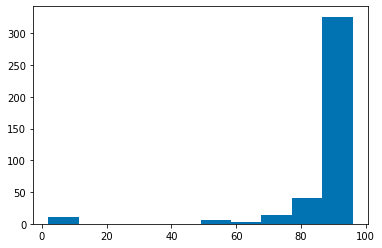

/home/martin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


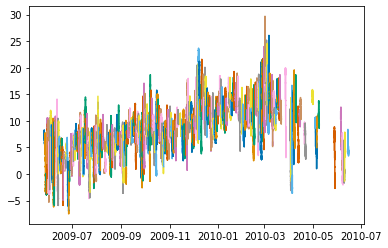

400
310


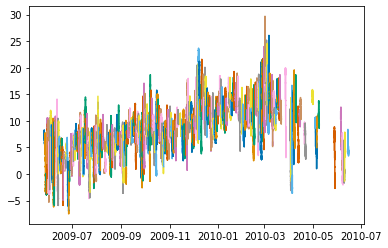

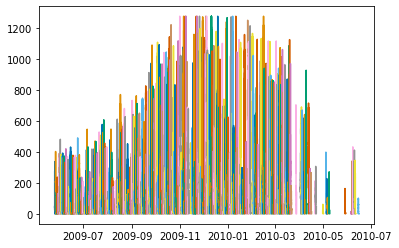

In [15]:
aux = []
for x in range(len(df.index)):
    aux.append(len(df['Temp'][x]))
plt.hist(aux), plt.show()

df_def = df
for x in range(len(df.index)):
    if (len(df['Temp'][x]) < 90) or (len(df['RadS'][x]) < 90):
        # contar la cantidad de puntos que tiene el dia
        df_def = df_def.drop(index=df.index[x])
    else:
        plt.plot(df['Fecha_real'][x], df['Temp'][x])

plt.show()
print(len(df))
print(len(df_def))

for x in range(len(df_def)):
    plt.plot(df_def['Fecha_real'][x], df_def['Temp'][x])
plt.show()

for x in range(len(df_def)):
    plt.plot(df_def['Fecha_real'][x], df_def['RadS'][x])
plt.show()

In [16]:
df = df_def
df.head()

,Temp,PAtm,Hume,RadS,Tiem,Fecha_real
2009-05-26,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-26 09:00:00, 2009-05-26 09:15:00, 200..."
2009-05-27,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-27 09:00:00, 2009-05-27 09:15:00, 200..."
2009-05-28,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-28 09:00:00, 2009-05-28 09:15:00, 200..."
2009-05-29,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-29 09:00:00, 2009-05-29 09:15:00, 200..."
2009-05-30,"[8.7, 8.7, 8.8, 8.9, 9.2, 9.5, 9.6, 9.6, 9.8, ...","[1018.0, 1018.0, 1018.1, 1018.1, 1018.1, 1018....","[81.0, 82.0, 82.0, 82.0, 80.0, 80.0, 80.0, 79....","[7.0, 9.0, 11.0, 39.0, 72.0, 78.0, 83.0, 76.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-30 09:00:00, 2009-05-30 09:15:00, 200..."


In [17]:
aux = []
for x in range(len(df)):
    hay = False
    for y in df['Temp'][x]:
        if y <= 0:
            hay = True
            break
    aux.append(hay)
df['Helada'] = aux

51


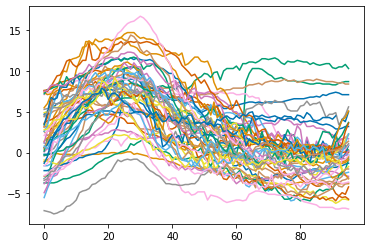

In [18]:
for x in range(len(df)):
    if df['Helada'][x]:
        plt.plot(df['Temp'][x])
print(sum(df['Helada'] == True))

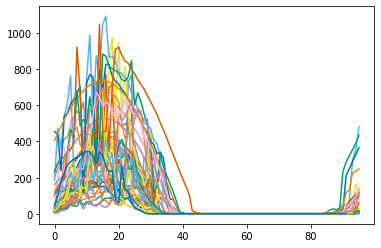

In [19]:
for x in range(len(df)):
    if df['Helada'][x]:
        plt.plot(df['RadS'][x])

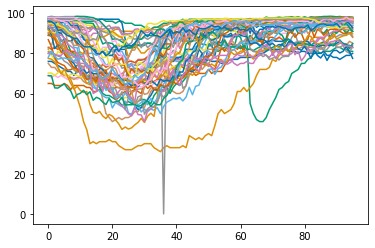

In [20]:
for x in range(len(df)):
    if df['Helada'][x]:
        plt.plot(df['Hume'][x])

In [21]:
def suavidad_de_curva(serie, epsilon=1e-1, limite=0):
    serie = np.diff(serie, 2)
    anterior = serie[0]
    contador = 0
    for count, x in enumerate(serie):
        if not (x > 1 - epsilon and x < 1 + epsilon):
            contador += 1
        if count > 50:
            return True
        if contador > limite:
            return False
    return True

In [22]:
aux = []
for x in range(len(df)):
    aux.append(suavidad_de_curva(df['RadS'][x], epsilon=40, limite=10))
print(sum(aux))
df['Suave'] = aux
df.head()

75


,Temp,PAtm,Hume,RadS,Tiem,Fecha_real,Helada,Suave
2009-05-26,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-26 09:00:00, 2009-05-26 09:15:00, 200...",False,True
2009-05-27,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-27 09:00:00, 2009-05-27 09:15:00, 200...",True,True
2009-05-28,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-28 09:00:00, 2009-05-28 09:15:00, 200...",True,True
2009-05-29,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-29 09:00:00, 2009-05-29 09:15:00, 200...",True,True
2009-05-30,"[8.7, 8.7, 8.8, 8.9, 9.2, 9.5, 9.6, 9.6, 9.8, ...","[1018.0, 1018.0, 1018.1, 1018.1, 1018.1, 1018....","[81.0, 82.0, 82.0, 82.0, 80.0, 80.0, 80.0, 79....","[7.0, 9.0, 11.0, 39.0, 72.0, 78.0, 83.0, 76.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-30 09:00:00, 2009-05-30 09:15:00, 200...",False,True


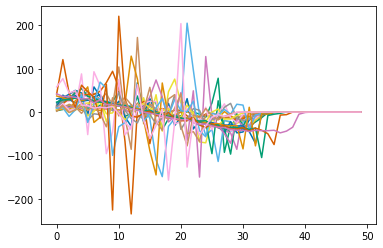

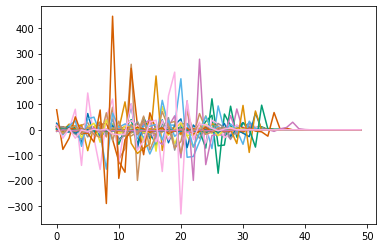

In [23]:
for x in range(len(df)):
    if df['Suave'][x] and df['Helada'][x]:
        plt.plot(np.diff(df['RadS'][x], 1)[:50])
plt.show()
for x in range(len(df)):
    if df['Suave'][x] and df['Helada'][x]:
        plt.plot(np.diff(df['RadS'][x], 2)[:50])
plt.show()

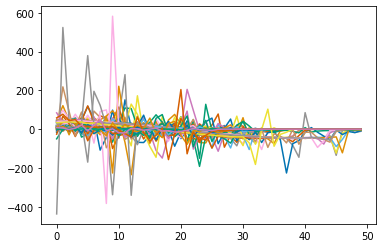

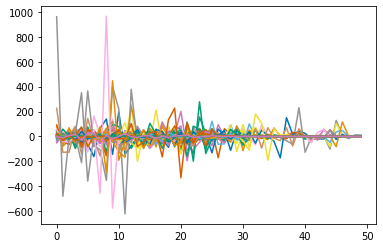

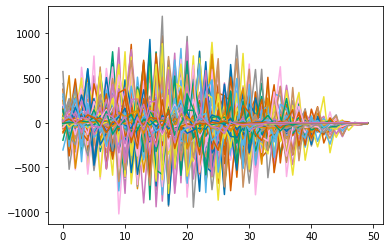

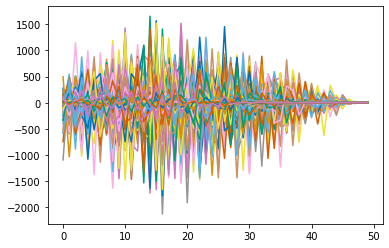

In [24]:
for x in range(len(df)):
    if df['Suave'][x]:
        plt.plot(np.diff(df['RadS'][x], 1)[:50])
plt.show()
for x in range(len(df)):
    if df['Suave'][x]:
        plt.plot(np.diff(df['RadS'][x], 2)[:50])
plt.show()

for x in range(len(df)):
    if not df['Suave'][x]:
        plt.plot(np.diff(df['RadS'][x], 1)[:50])
plt.show()
for x in range(len(df)):
    if not df['Suave'][x]:
        plt.plot(np.diff(df['RadS'][x], 2)[:50])
plt.show()

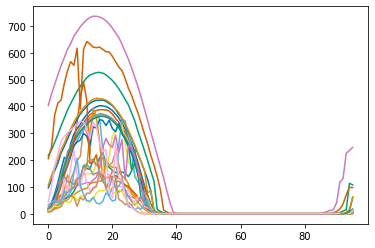

In [25]:
for x in range(len(df)):
    if df['Suave'][x] and df['Helada'][x] :
        plt.plot(df['RadS'][x])

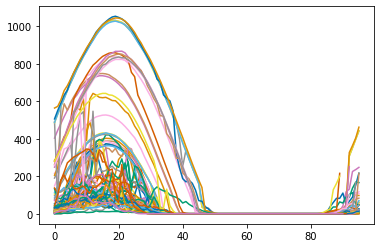

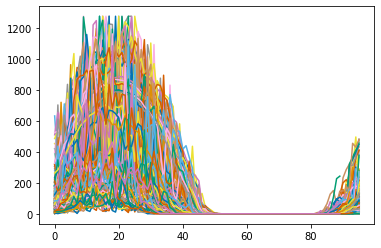

In [26]:
for x in range(len(df)):
    if df['Suave'][x]:
        plt.plot(df['RadS'][x])
plt.show()
for x in range(len(df)):
    if not df['Suave'][x]:
        plt.plot(df['RadS'][x])
plt.show()

/home/martin/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


27
51
75


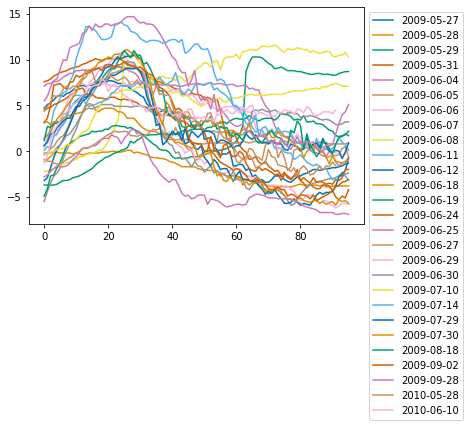

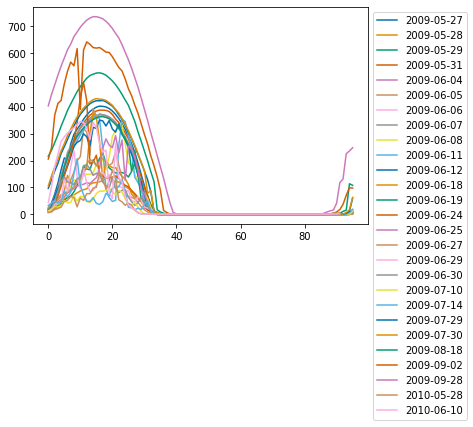

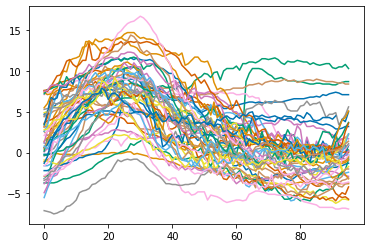

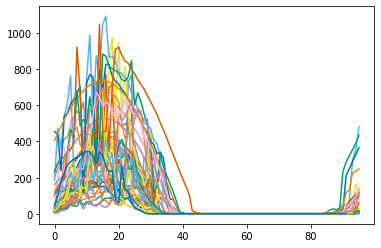

In [27]:
print(sum((df['Helada'] == True) * (df['Suave'] == True)))
print(sum(df['Helada'] == True))
print(sum(df['Suave'] == True))
for x in range(len(df)):
    if df['Suave'][x] and df['Helada'][x]:
        plt.plot(df['Temp'][x], label=df.index[x])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

for x in range(len(df)):
    if df['Suave'][x] and df['Helada'][x]:
        plt.plot(df['RadS'][x], label=df.index[x])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

for x in range(len(df)):
    if df['Helada'][x]:
        plt.plot(df['Temp'][x], label=df.index[x])
# plt.legend(bbox_to_anchor=(1, 1))
plt.show()

for x in range(len(df)):
    if df['Helada'][x]:
        plt.plot(df['RadS'][x], label=df.index[x])
# plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [28]:
print(df.loc[df['Suave'] == True].index)
df_prueba2 = df.drop(index=df.loc[df['Suave'] == False].index)

Index(['2009-05-26', '2009-05-27', '2009-05-28', '2009-05-29', '2009-05-30',
       '2009-05-31', '2009-06-03', '2009-06-04', '2009-06-05', '2009-06-06',
       '2009-06-07', '2009-06-08', '2009-06-09', '2009-06-10', '2009-06-11',
       '2009-06-12', '2009-06-13', '2009-06-16', '2009-06-18', '2009-06-19',
       '2009-06-22', '2009-06-24', '2009-06-25', '2009-06-27', '2009-06-28',
       '2009-06-29', '2009-06-30', '2009-07-01', '2009-07-02', '2009-07-03',
       '2009-07-08', '2009-07-10', '2009-07-11', '2009-07-14', '2009-07-18',
       '2009-07-20', '2009-07-24', '2009-07-29', '2009-07-30', '2009-07-31',
       '2009-08-01', '2009-08-02', '2009-08-08', '2009-08-10', '2009-08-11',
       '2009-08-15', '2009-08-18', '2009-08-19', '2009-08-25', '2009-08-27',
       '2009-08-28', '2009-09-02', '2009-09-04', '2009-09-12', '2009-09-28',
       '2009-09-29', '2009-10-15', '2009-12-06', '2009-12-07', '2009-12-08',
       '2009-12-11', '2009-12-15', '2009-12-27', '2010-02-24', '2010-02-25',

In [29]:
df_prueba2

,Temp,PAtm,Hume,RadS,Tiem,Fecha_real,Helada,Suave
2009-05-26,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-26 09:00:00, 2009-05-26 09:15:00, 200...",False,True
2009-05-27,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-27 09:00:00, 2009-05-27 09:15:00, 200...",True,True
2009-05-28,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-28 09:00:00, 2009-05-28 09:15:00, 200...",True,True
2009-05-29,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-29 09:00:00, 2009-05-29 09:15:00, 200...",True,True
2009-05-30,"[8.7, 8.7, 8.8, 8.9, 9.2, 9.5, 9.6, 9.6, 9.8, ...","[1018.0, 1018.0, 1018.1, 1018.1, 1018.1, 1018....","[81.0, 82.0, 82.0, 82.0, 80.0, 80.0, 80.0, 79....","[7.0, 9.0, 11.0, 39.0, 72.0, 78.0, 83.0, 76.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-30 09:00:00, 2009-05-30 09:15:00, 200...",False,True
2009-05-31,"[7.6, 7.7, 7.9, 8.2, 8.4, 8.6, 8.7, 8.8, 9.0, ...","[1022.8, 1023.1, 1023.2, 1023.0, 1023.5, 1023....","[65.0, 65.0, 64.0, 64.0, 64.0, 65.0, 64.0, 62....","[18.0, 34.0, 64.0, 99.0, 138.0, 179.0, 216.0, ...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-31 09:00:00, 2009-05-31 09:15:00, 200...",True,True
2009-06-03,"[8.4, 8.7, 8.8, 9.1, 9.8, 10.4, 10.7, 10.2, 10...","[1009.1, 1009.2, 1009.4, 1009.4, 1009.3, 1009....","[85.0, 84.0, 83.0, 83.0, 79.0, 79.0, 76.0, 78....","[22.0, 33.0, 40.0, 63.0, 140.0, 169.0, 222.0, ...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-06-03 09:00:00, 2009-06-03 09:15:00, 200...",False,True
2009-06-04,"[7.1, 7.4, 7.4, 7.6, 7.6, 7.8, 8.1, 8.3, 8.5, ...","[1011.4, 1012.0, 1011.9, 1012.5, 1012.5, 1012....","[69.0, 68.0, 69.0, 68.0, 69.0, 68.0, 67.0, 68....","[15.0, 28.0, 54.0, 87.0, 125.0, 163.0, 201.0, ...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-06-04 09:00:00, 2009-06-04 09:15:00, 200...",True,True
2009-06-05,"[-0.4, -0.2, 0.3, 0.5, 1.1, 1.5, 1.7, 2.3, 3.1...","[1026.9, 1027.1, 1027.4, 1027.6, 1027.8, 1027....","[95.0, 95.0, 95.0, 96.0, 95.0, 93.0, 94.0, 93....","[25.0, 37.0, 43.0, 61.0, 73.0, 70.0, 85.0, 128...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-06-05 09:00:00, 2009-06-05 09:15:00, 200...",True,True
2009-06-06,"[0.4, 1.6, 2.2, 2.0, 2.4, 2.3, 3.2, 3.7, 4.4, ...","[1024.3, 1024.4, 1024.2, 1024.2, 1024.0, 1024....","[82.0, 79.0, 77.0, 81.0, 80.0, 82.0, 79.0, 78....","[16.0, 29.0, 52.0, 77.0, 117.0, 157.0, 192.0, ...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-06-06 09:00:00, 2009-06-06 09:15:00, 200...",True,True


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1.

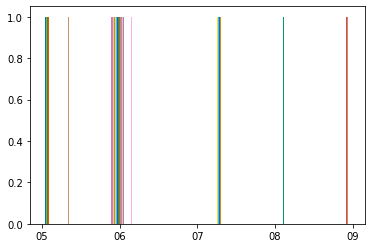

In [30]:
aux = []
for x in df_prueba2.index:
    if df_prueba2['Helada'][x]:
        aux.append(x.split('-')[1])
plt.hist(aux)

In [31]:
df = df_prueba2

In [32]:
# reformular dataset
"""
como se quiere predecir la curva a partir de las 19.00, se dejará como datos de input, los valores anteriores
a dicha hora, para ello, se debe separar el dataset y encontrar un metodo que mapee de esas entradas a los
valores que se quieren. Por ejemplo, se puede hacer una red que prediga a una hora, a dos horas, a tres horas, etc.
Para esto, se deben interpolar los datos y tener cada cierto intervalo los datos.
"""

'\ncomo se quiere predecir la curva a partir de las 19.00, se dejará como datos de input, los valores anteriores\na dicha hora, para ello, se debe separar el dataset y encontrar un metodo que mapee de esas entradas a los\nvalores que se quieren. Por ejemplo, se puede hacer una red que prediga a una hora, a dos horas, a tres horas, etc.\nPara esto, se deben interpolar los datos y tener cada cierto intervalo los datos.\n'

In [33]:
TEMP_INP = []
PATM_INP = []
HUME_INP = []
RADS_INP = []
TIEM_INP = []

TEMP_OUT = []
PATM_OUT = []
HUME_OUT = []
RADS_OUT = []
TIEM_OUT = []


In [34]:
# recorrer dia a dia
for x in range(len(df)):
    temp_inp = []
    patm_inp = []
    hume_inp = []
    rads_inp = []
    tiem_inp = []
    
    temp_out = []
    patm_out = []
    hume_out = []
    rads_out = []
    tiem_out = []
# recorrer arreglo de Tiem para ver horas
    inicio = df['Tiem'][x][0]
    for i, h in enumerate(df['Tiem'][x]):
        if h < time(19) and h >= inicio:
# despues de las 19.00 es el output deseado, en la temperatura
            temp_inp.append(df['Temp'][x][i])
            patm_inp.append(df['PAtm'][x][i])
            hume_inp.append(df['Hume'][x][i])
            rads_inp.append(df['RadS'][x][i])
            tiem_inp.append(df['Tiem'][x][i])
        else:
# antes de las 19.00 se considera un input
            temp_out.append(df['Temp'][x][i])
            patm_out.append(df['PAtm'][x][i])
            hume_out.append(df['Hume'][x][i])
            rads_out.append(df['RadS'][x][i])
            tiem_out.append(df['Tiem'][x][i])
# resultado, mas columnas con var_in, temp_out
    TEMP_INP.append(temp_inp)
    PATM_INP.append(patm_inp)
    HUME_INP.append(hume_inp)
    RADS_INP.append(rads_inp)
    TIEM_INP.append(tiem_inp)

    TEMP_OUT.append(temp_out)
    PATM_OUT.append(patm_out)
    HUME_OUT.append(hume_out)
    RADS_OUT.append(rads_out)
    TIEM_OUT.append(tiem_out)

In [35]:
df['Temp_inp'] = TEMP_INP
df['PAtm_inp'] = PATM_INP
df['Hume_inp'] = HUME_INP
df['RadS_inp'] = RADS_INP
df['Tiem_inp'] = TIEM_INP

df['Temp_out'] = TEMP_OUT
df['PAtm_out'] = PATM_OUT
df['Hume_out'] = HUME_OUT
df['RadS_out'] = RADS_OUT
df['Tiem_out'] = TIEM_OUT

In [36]:
df.head()

,Temp,PAtm,Hume,RadS,Tiem,Fecha_real,Helada,Suave,Temp_inp,PAtm_inp,Hume_inp,RadS_inp,Tiem_inp,Temp_out,PAtm_out,Hume_out,RadS_out,Tiem_out
2009-05-26,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-26 09:00:00, 2009-05-26 09:15:00, 200...",False,True,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.2, 6.1, 6.0, ...","[1021.9, 1022.5, 1022.5, 1022.6, 1022.6, 1022....","[75.0, 75.0, 75.0, 75.0, 76.0, 75.0, 76.0, 77....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00..."
2009-05-27,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-27 09:00:00, 2009-05-27 09:15:00, 200...",True,True,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[4.3, 3.9, 3.7, 4.1, 3.7, 3.8, 2.9, 2.4, 3.2, ...","[1026.2, 1026.1, 1026.4, 1026.4, 1026.5, 1026....","[77.0, 78.0, 78.0, 76.0, 78.0, 77.0, 76.0, 82....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00..."
2009-05-28,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-28 09:00:00, 2009-05-28 09:15:00, 200...",True,True,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[-1.2, -1.3, -1.5, -1.7, -1.7, -1.7, -1.7, -1....","[1023.4, 1023.5, 1023.4, 1023.6, 1023.6, 1023....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00..."
2009-05-29,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-29 09:00:00, 2009-05-29 09:15:00, 200...",True,True,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[-0.6, -0.8, -0.7, -0.8, -0.8, -0.7, -0.6, -0....","[1017.6, 1017.4, 1017.4, 1017.4, 1017.4, 1017....","[95.0, 96.0, 97.0, 96.0, 97.0, 97.0, 97.0, 96....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00..."
2009-05-30,"[8.7, 8.7, 8.8, 8.9, 9.2, 9.5, 9.6, 9.6, 9.8, ...","[1018.0, 1018.0, 1018.1, 1018.1, 1018.1, 1018....","[81.0, 82.0, 82.0, 82.0, 80.0, 80.0, 80.0, 79....","[7.0, 9.0, 11.0, 39.0, 72.0, 78.0, 83.0, 76.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-30 09:00:00, 2009-05-30 09:15:00, 200...",False,True,"[8.7, 8.7, 8.8, 8.9, 9.2, 9.5, 9.6, 9.6, 9.8, ...","[1018.0, 1018.0, 1018.1, 1018.1, 1018.1, 1018....","[81.0, 8

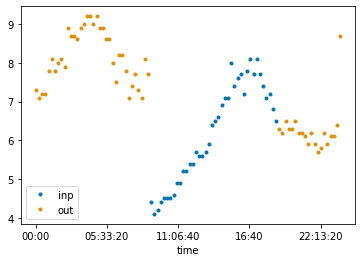

In [37]:
x = 30
plt.plot(df['Tiem_inp'][x], df['Temp_inp'][x], '.', label='inp')
plt.plot(df['Tiem_out'][x], df['Temp_out'][x], '.', label='out')
plt.legend()
plt.show()
# x = 2
# plt.plot(df['Tiem_inp'][x], df['Temp_inp'][x], '.', label='inp')
# plt.plot(df['Tiem_out'][x], df['RadS_out'][x], '.', label='out')
# plt.legend()
# plt.show()

In [38]:
# crear arreglo de tiempo asociado a medicion del dia
TIEMPO_INP = []
TIEMPO_OUT = []

# recorrer hora e ir sumando a medida que el tiempo pase
for x in range(len(df)):
    hora = df['Tiem_inp'][x][0]
    anterior = hora.hour * 60 + hora.minute
    suma = 0
    tiempo_inp = []
    tiempo_out = []
    
    for i, h in enumerate(df['Tiem_inp'][x]):
        h = h.hour * 60 + h.minute
        suma += h - anterior
        anterior = h
        tiempo_inp.append(suma)
    
    for i, h in enumerate(df['Tiem_out'][x]):
        h = h.hour * 60 + h.minute
        if h < anterior:
            suma += h - anterior + 24*60
            anterior = h
        else:
            suma += h - anterior
            anterior = h
        tiempo_out.append(suma)
    TIEMPO_INP.append(tiempo_inp)
    TIEMPO_OUT.append(tiempo_out)
# agregar dicho arreglo al dataframe

In [39]:
df['tabs_inp'] = TIEMPO_INP
df['tabs_out'] = TIEMPO_OUT
df.head()

,Temp,PAtm,Hume,RadS,Tiem,Fecha_real,Helada,Suave,Temp_inp,PAtm_inp,Hume_inp,RadS_inp,Tiem_inp,Temp_out,PAtm_out,Hume_out,RadS_out,Tiem_out,tabs_inp,tabs_out
2009-05-26,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-26 09:00:00, 2009-05-26 09:15:00, 200...",False,True,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.2, 6.1, 6.0, ...","[1021.9, 1022.5, 1022.5, 1022.6, 1022.6, 1022....","[75.0, 75.0, 75.0, 75.0, 76.0, 75.0, 76.0, 77....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00...","[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150...","[600, 615, 630, 645, 660, 675, 690, 705, 720, ..."
2009-05-27,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-27 09:00:00, 2009-05-27 09:15:00, 200...",True,True,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[4.3, 3.9, 3.7, 4.1, 3.7, 3.8, 2.9, 2.4, 3.2, ...","[1026.2, 1026.1, 1026.4, 1026.4, 1026.5, 1026....","[77.0, 78.0, 78.0, 76.0, 78.0, 77.0, 76.0, 82....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00...","[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150...","[600, 615, 630, 645, 660, 675, 690, 705, 720, ..."
2009-05-28,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-28 09:00:00, 2009-05-28 09:15:00, 200...",True,True,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[-1.2, -1.3, -1.5, -1.7, -1.7, -1.7, -1.7, -1....","[1023.4, 1023.5, 1023.4, 1023.6, 1023.6, 1023....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00...","[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150...","[600, 615, 630, 645, 660, 675, 690, 705, 720, ..."
2009-05-29,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-29 09:00:00, 2009-05-29 09:15:00, 200...",True,True,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[-0.6, -0.8, -0.7, -0.8, -0.8, -0.7, -0.6, -0....","[1017.6, 1017.4, 1017.4, 1017.4, 1017.4, 1017....","[95.0, 96.0, 97.0, 96.0, 97.0, 97.0, 97.0, 96....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19:00:00, 19:15:00, 19:30:00, 19:45:00, 20:00...","[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150...","[600, 615, 630, 645, 660, 675, 690, 705, 720, ..."
2009-05-30,"[

In [40]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# interpolar datos para dejar todos con el mismo largo de input y output
# funcion que recibe la cantidad de puntos a interpolar
def interpolar(serie, n_puntos):
# ajustar con procesos gaussianos
#     kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#     gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)
# escoger cantidad de puntos a sacar
    # crear base de entrenamiento
    y = serie

    X = np.linspace(0, len(y), len(y))
    X = np.atleast_2d(X).T

    gp = GaussianProcessRegressor(n_restarts_optimizer=100)

    gp.fit(X, y)
    
    x = np.atleast_2d(np.linspace(0, len(y), n_puntos)).T
    y_pred, sigma = gp.predict(x, return_std=True)
    
    return y_pred


75
10
40
10
56


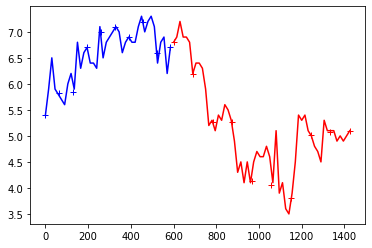

In [41]:
print(len(df))
x = 45
n = 10
plt.plot(interpolar(df['tabs_inp'][x], n), interpolar(df['Temp_inp'][x], n), '+b')
print(len(interpolar(df['Temp_inp'][x], n)))
plt.plot(df['tabs_inp'][x], df['Temp_inp'][x], 'b')
print(len(df['Temp_inp'][x]))

plt.plot(interpolar(df['tabs_out'][x], n), interpolar(df['Temp_out'][x], n), '+r')
print(len(interpolar(df['Temp_out'][x], n)))
plt.plot(df['tabs_out'][x], df['Temp_out'][x], 'r')
print(len(df['Temp_out'][x]))

In [42]:
TEMP_INP_in = []
PATM_INP_in = []
HUME_INP_in = []
RADS_INP_in = []
TIEM_INP_in = []

TEMP_OUT_in = []
PATM_OUT_in = []
HUME_OUT_in = []
RADS_OUT_in = []
TIEM_OUT_in = []


In [43]:
# recorrer dia a dia
n_in = 24
n_out = 15
for x in range(len(df)):
    temp_inp = interpolar(df['Temp_inp'][x], n_in)
    patm_inp = interpolar(df['PAtm_inp'][x], n_in)
    hume_inp = interpolar(df['Hume_inp'][x], n_in)
    rads_inp = interpolar(df['RadS_inp'][x], n_in)
    tiem_inp = interpolar(df['tabs_inp'][x], n_in)
    
    temp_out = interpolar(df['Temp_out'][x], n_out)
    patm_out = interpolar(df['PAtm_out'][x], n_out)
    hume_out = interpolar(df['Hume_out'][x], n_out)
    rads_out = interpolar(df['RadS_out'][x], n_out)
    tiem_out = interpolar(df['tabs_out'][x], n_out)
    
    TEMP_INP_in.append(temp_inp)
    PATM_INP_in.append(patm_inp)
    HUME_INP_in.append(hume_inp)
    RADS_INP_in.append(rads_inp)
    TIEM_INP_in.append(tiem_inp)

    TEMP_OUT_in.append(temp_out)
    PATM_OUT_in.append(patm_out)
    HUME_OUT_in.append(hume_out)
    RADS_OUT_in.append(rads_out)
    TIEM_OUT_in.append(tiem_out)

In [44]:
df['Temp_inp_in'] = TEMP_INP_in
df['PAtm_inp_in'] = PATM_INP_in
df['Hume_inp_in'] = HUME_INP_in
df['RadS_inp_in'] = RADS_INP_in
df['Tiem_inp_in'] = TIEM_INP_in

df['Temp_out_in'] = TEMP_OUT_in
df['PAtm_out_in'] = PATM_OUT_in
df['Hume_out_in'] = HUME_OUT_in
df['RadS_out_in'] = RADS_OUT_in
df['Tiem_out_in'] = TIEM_OUT_in

In [45]:
df.head()

,Temp,PAtm,Hume,RadS,Tiem,Fecha_real,Helada,Suave,Temp_inp,PAtm_inp,...,Temp_inp_in,PAtm_inp_in,Hume_inp_in,RadS_inp_in,Tiem_inp_in,Temp_out_in,PAtm_out_in,Hume_out_in,RadS_out_in,Tiem_out_in
2009-05-26,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....","[80.0, 77.0, 77.0, 78.0, 79.0, 78.0, 76.0, 73....","[29.0, 37.0, 52.0, 37.0, 59.0, 105.0, 222.0, 2...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-26 09:00:00, 2009-05-26 09:15:00, 200...",False,True,"[6.4, 6.7, 6.9, 6.8, 6.8, 7.1, 7.8, 8.3, 7.9, ...","[1019.6, 1019.9, 1019.8, 1020.0, 1020.1, 1020....",...,"[6.399999999452042, 6.80464006910479, 6.742648...","[1019.5999999108386, 1007.8493601112052, 1014....","[79.99999999270761, 75.81231137560616, 78.1171...","[28.999999995967187, 51.62142562293938, 41.731...","[8.500817827439278e-10, 25.663943942051805, 50...","[6.299999999447098, 6.293020680729345, 6.00770...","[1021.8999999102564, 1021.7070564929292, 1022....","[74.99999999336084, 75.93281696830144, 76.9548...","[-3.4925762660490922e-22, 5.486819734043136e-1...","[599.999999948137, 658.4174266428207, 717.7286..."
2009-05-27,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....","[76.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 71....","[21.0, 42.0, 75.0, 116.0, 166.0, 210.0, 204.0,...","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-27 09:00:00, 2009-05-27 09:15:00, 200...",True,True,"[4.7, 5.1, 5.3, 5.6, 6.0, 6.1, 6.0, 6.3, 6.4, ...","[1027.0, 1027.3, 1027.2, 1027.3, 1027.2, 1027....",...,"[4.699999999621224, 5.1951684494616845, 5.7388...","[1026.9999999101888, 1015.1704513924333, 1022....","[75.99999999340555, 74.43875383566662, 73.1804...","[20.99999999939285, 62.997754665030065, 132.10...","[8.500817827439278e-10, 25.663943942051805, 50...","[4.299999999631375, 3.7123546402059038, 3.0976...","[1026.1999999097757, 1025.5959725175942, 1026....","[76.99999999320329, 77.77708438793118, 81.1008...","[4.265501423678171e-22, -6.701080859890795e-13...","[599.999999948137, 658.4174266428207, 717.7286..."
2009-05-28,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....","[94.0, 94.0, 95.0, 92.0, 93.0, 92.0, 92.0, 93....","[14.0, 23.0, 32.0, 42.0, 53.0, 57.0, 63.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-28 09:00:00, 2009-05-28 09:15:00, 200...",True,True,"[-1.1, -0.9, -0.6, -0.2, -0.1, -0.2, -0.2, -0....","[1027.8, 1028.0, 1028.0, 1027.9, 1027.8, 1027....",...,"[-1.0999999998918888, -0.6958711003155896, -0....","[1027.799999910101, 1015.9371416500508, 1022.6...","[93.99999999153567, 94.12662031806693, 91.5426...","[13.999999999221654, 29.34459728765212, 46.808...","[8.500817827439278e-10, 25.663943942051805, 50...","[-1.1999999998989441, -1.7021340947325938, -1....","[1023.3999999100886, 1022.7018908160427, 1022....","[95.99999999156415, 95.91400716634286, 95.9557...","[8.842173007279732e-22, -1.389104542799835e-12...","[599.999999948137, 658.4174266428207, 717.7286..."
2009-05-29,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....","[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96....","[12.0, 15.0, 21.0, 34.0, 39.0, 53.0, 62.0, 68....","[09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00...","[2009-05-29 09:00:00, 2009-05-29 09:15:00, 200...",True,True,"[-3.7, -3.7, -3.7, -3.7, -3.6, -3.4, -3.2, -3....","[1019.5, 1019.6, 1019.4, 1019.4, 1019.6, 1019....",...,"[-3.699999999677707, -3.6530725074585924, -3.6...","[1019.4999999108254, 1007.4913612697294, 1014....","[95.99999999160117, 94.87192770751449, 95.5180...","[11.999999999431473, 17.68446714472223, 36.024...","[8.500817827439278e-10, 25.663943942051805, 50...","[-0.5999999999789549, -0.8059233754362979, -0....","[1017.5999999105516, 1016.5001888046072, 1017....","[94.99999999159604, 96.85454710892247, 96.8112...","[3.160775058425893e-22, -4.965580110671129e-13...","[599.999999948

In [46]:
data = {'Temp_inp': df['Temp_inp_in'],
        'PAtm_inp': df['PAtm_inp_in'],
        'Hume_inp': df['Hume_inp_in'],
        'RadS_inp': df['RadS_inp_in'],
        'Tiem_inp': df['Tiem_inp_in'],
        'Temp_out': df['Temp_out_in'],
        'PAtm_out': df['PAtm_out_in'],
        'Hume_out': df['Hume_out_in'],
        'RadS_out': df['RadS_out_in'],
        'Tiem_out': df['Tiem_out_in']}
df_aux = pd.DataFrame(data)
df_aux.head()

,Temp_inp,PAtm_inp,Hume_inp,RadS_inp,Tiem_inp,Temp_out,PAtm_out,Hume_out,RadS_out,Tiem_out
2009-05-26,"[6.399999999452042, 6.80464006910479, 6.742648...","[1019.5999999108386, 1007.8493601112052, 1014....","[79.99999999270761, 75.81231137560616, 78.1171...","[28.999999995967187, 51.62142562293938, 41.731...","[8.500817827439278e-10, 25.663943942051805, 50...","[6.299999999447098, 6.293020680729345, 6.00770...","[1021.8999999102564, 1021.7070564929292, 1022....","[74.99999999336084, 75.93281696830144, 76.9548...","[-3.4925762660490922e-22, 5.486819734043136e-1...","[599.999999948137, 658.4174266428207, 717.7286..."
2009-05-27,"[4.699999999621224, 5.1951684494616845, 5.7388...","[1026.9999999101888, 1015.1704513924333, 1022....","[75.99999999340555, 74.43875383566662, 73.1804...","[20.99999999939285, 62.997754665030065, 132.10...","[8.500817827439278e-10, 25.663943942051805, 50...","[4.299999999631375, 3.7123546402059038, 3.0976...","[1026.1999999097757, 1025.5959725175942, 1026....","[76.99999999320329, 77.77708438793118, 81.1008...","[4.265501423678171e-22, -6.701080859890795e-13...","[599.999999948137, 658.4174266428207, 717.7286..."
2009-05-28,"[-1.0999999998918888, -0.6958711003155896, -0....","[1027.799999910101, 1015.9371416500508, 1022.6...","[93.99999999153567, 94.12662031806693, 91.5426...","[13.999999999221654, 29.34459728765212, 46.808...","[8.500817827439278e-10, 25.663943942051805, 50...","[-1.1999999998989441, -1.7021340947325938, -1....","[1023.3999999100886, 1022.7018908160427, 1022....","[95.99999999156415, 95.91400716634286, 95.9557...","[8.842173007279732e-22, -1.389104542799835e-12...","[599.999999948137, 658.4174266428207, 717.7286..."
2009-05-29,"[-3.699999999677707, -3.6530725074585924, -3.6...","[1019.4999999108254, 1007.4913612697294, 1014....","[95.99999999160117, 94.87192770751449, 95.5180...","[11.999999999431473, 17.68446714472223, 36.024...","[8.500817827439278e-10, 25.663943942051805, 50...","[-0.5999999999789549, -0.8059233754362979, -0....","[1017.5999999105516, 1016.5001888046072, 1017....","[94.99999999159604, 96.85454710892247, 96.8112...","[3.160775058425893e-22, -4.965580110671129e-13...","[599.999999948137, 658.4174266428207, 717.7286..."
2009-05-30,"[8.699999999231409, 8.669912539804741, 8.95189...","[1017.9999999109308, 1006.1110051283736, 1012....","[80.99999999305855, 81.00603231938939, 80.9093...","[6.9999999998086295, 8.798864362060854, 54.800...","[8.500817827439278e-10, 25.663943942051805, 50...","[10.199999999181221, 9.726949238941348, 9.3265...","[1017.8999999105409, 1017.8014888149846, 1018....","[68.99999999335147, 70.79151828341693, 72.8621...","[-9.608229900105849e-23, 1.50945106647567e-13,...","[599.999999948137, 658.4174266428207, 717.7286..."


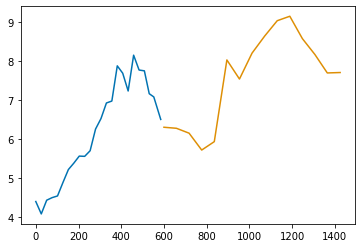

In [47]:
x = 30
plt.plot(df_aux['Tiem_inp'][x], df_aux['Temp_inp'][x])
plt.plot(df_aux['Tiem_out'][x], df_aux['Temp_out'][x])

In [48]:
x = 4
print(len(df_aux['Tiem_inp'][x]))
print(len(df_aux['Temp_inp'][x]))
print(len(df_aux['Hume_inp'][x]))
print(len(df_aux['RadS_inp'][x]))
print(len(df_aux['PAtm_inp'][x]))

print(len(df_aux['Tiem_out'][x]))
print(len(df_aux['Temp_out'][x]))
print(len(df_aux['Hume_out'][x]))
print(len(df_aux['RadS_out'][x]))
print(len(df_aux['PAtm_out'][x]))


24
24
24
24
24
15
15
15
15
15


In [60]:
# regresor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

D_input_train = []
D_output_train = []
D_input_test = []
D_output_test = []

indices_train = []
indices_test = []
for x in range(len(df)):
    if x < round(len(df) / 4 * 3):
        indices_train.append(x)
        D_input_train.append(np.concatenate([df_aux['Temp_inp'][x],
                                       df_aux['Hume_inp'][x],
                                       df_aux['PAtm_inp'][x],
                                       df_aux['RadS_inp'][x], df_aux['RadS_out'][x],
                                       df_aux['Tiem_inp'][x], df_aux['Tiem_out'][x]]))
        D_output_train.append(df_aux['Temp_out'][x])
    else:
        indices_test.append(x)
        D_input_test.append(np.concatenate([df_aux['Temp_inp'][x],
                                       df_aux['Hume_inp'][x],
                                       df_aux['PAtm_inp'][x],
                                       df_aux['RadS_inp'][x], df_aux['RadS_out'][x],
                                       df_aux['Tiem_inp'][x], df_aux['Tiem_out'][x]]))
        D_output_test.append(df_aux['Temp_out'][x])


In [61]:
print('train shape: ', len(D_input_train), len(D_input_train[0]))
print('test shape: ', len(D_input_test), len(D_input_test[0]))

train shape:  56 150
test shape:  19 150


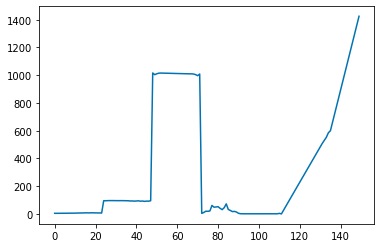

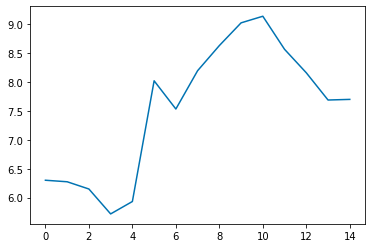

([<matplotlib.lines.Line2D at 0x7fc15821fb38>], None)

In [62]:
x = 30
plt.plot(D_input_train[x]), plt.show()
plt.plot(D_output_train[x]), plt.show()


In [63]:
# Scaler_in = StandardScaler().fit(D_input_train)
Scaler_in = MinMaxScaler().fit(D_input_train)
D_input_train = Scaler_in.transform(D_input_train)
D_input_test = Scaler_in.transform(D_input_test)

# Scaler_out = StandardScaler().fit(D_output_train)
Scaler_out = MinMaxScaler().fit(D_output_train)
D_output_train = Scaler_out.transform(D_output_train)
D_output_test = Scaler_out.transform(D_output_test)


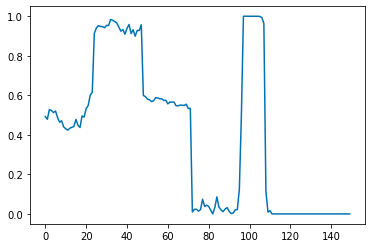

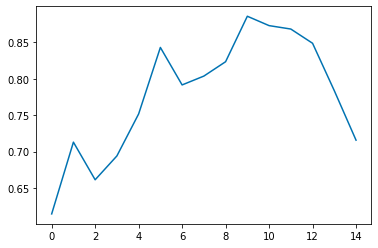

([<matplotlib.lines.Line2D at 0x7fc157f30a58>], None)

In [64]:
x = 30
plt.plot(D_input_train[x]), plt.show()
plt.plot(D_output_train[x]), plt.show()


In [65]:
clf = MLPRegressor(hidden_layer_sizes=(100, 50, 3),
                   activation='relu',
                   verbose=True,
                   n_iter_no_change=20,
                   max_iter=1000,
                   early_stopping=True,
                   validation_fraction=0.3)
clf.fit(D_input_train, D_output_train)

Iteration 1, loss = 0.35012538
Validation score: -13.589690
Iteration 2, loss = 0.30177208
Validation score: -12.117983
Iteration 3, loss = 0.27610750
Validation score: -11.516717
Iteration 4, loss = 0.26728504
Validation score: -11.335284
Iteration 5, loss = 0.26528662
Validation score: -11.284194
Iteration 6, loss = 0.26456088
Validation score: -11.239835
Iteration 7, loss = 0.26396206
Validation score: -11.198964
Iteration 8, loss = 0.26336323
Validation score: -11.160663
Iteration 9, loss = 0.26276456
Validation score: -11.130474
Iteration 10, loss = 0.26216620
Validation score: -11.100330
Iteration 11, loss = 0.26156827
Validation score: -11.070232
Iteration 12, loss = 0.26097087
Validation score: -11.040183
Iteration 13, loss = 0.26037409
Validation score: -11.010183
Iteration 14, loss = 0.25977801
Validation score: -10.980234
Iteration 15, loss = 0.25918267
Validation score: -10.950338
Iteration 16, loss = 0.25858815
Validation score: -10.920495
Iteration 17, loss = 0.25799449
V

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uni

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uni

Validation score: -8.913847
Iteration 90, loss = 0.21790165
Validation score: -8.888741
Iteration 91, loss = 0.21739885
Validation score: -8.863697
Iteration 92, loss = 0.21689726
Validation score: -8.838714
Iteration 93, loss = 0.21639687
Validation score: -8.813792
Iteration 94, loss = 0.21589768
Validation score: -8.788931
Iteration 95, loss = 0.21539970
Validation score: -8.764131
Iteration 96, loss = 0.21490290
Validation score: -8.739391
Iteration 97, loss = 0.21440731
Validation score: -8.714712
Iteration 98, loss = 0.21391290
Validation score: -8.690093
Iteration 99, loss = 0.21341967
Validation score: -8.665535
Iteration 100, loss = 0.21292763
Validation score: -8.641036
Iteration 101, loss = 0.21243678
Validation score: -8.616597
Iteration 102, loss = 0.21194710
Validation score: -8.592218
Iteration 103, loss = 0.21145859
Validation score: -8.567898
Iteration 104, loss = 0.21097126
Validation score: -8.543638
Iteration 105, loss = 0.21048509
Validation score: -8.519437
Iterat

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uni

Validation score: -6.943008
Iteration 177, loss = 0.17837450
Validation score: -6.922640
Iteration 178, loss = 0.17796643
Validation score: -6.902323
Iteration 179, loss = 0.17755933
Validation score: -6.882057
Iteration 180, loss = 0.17715321
Validation score: -6.861841
Iteration 181, loss = 0.17674807
Validation score: -6.841677
Iteration 182, loss = 0.17634390
Validation score: -6.821564
Iteration 183, loss = 0.17594070
Validation score: -6.801501
Iteration 184, loss = 0.17553848
Validation score: -6.781489
Iteration 185, loss = 0.17513722
Validation score: -6.761527
Iteration 186, loss = 0.17473693
Validation score: -6.741615
Iteration 187, loss = 0.17433760
Validation score: -6.721754
Iteration 188, loss = 0.17393923
Validation score: -6.701942
Iteration 189, loss = 0.17354182
Validation score: -6.682181
Iteration 190, loss = 0.17314537
Validation score: -6.662469
Iteration 191, loss = 0.17274988
Validation score: -6.642807
Iteration 192, loss = 0.17235534
Validation score: -6.623

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uni

Validation score: -0.906579
Iteration 270, loss = 0.04493787
Validation score: -0.872424
Iteration 271, loss = 0.04392456
Validation score: -0.840357
Iteration 272, loss = 0.04295208
Validation score: -0.809330
Iteration 273, loss = 0.04201501
Validation score: -0.779312
Iteration 274, loss = 0.04111155
Validation score: -0.750535
Iteration 275, loss = 0.04024350
Validation score: -0.723187
Iteration 276, loss = 0.03941055
Validation score: -0.697543
Iteration 277, loss = 0.03861031
Validation score: -0.673410
Iteration 278, loss = 0.03784285
Validation score: -0.650477
Iteration 279, loss = 0.03710623
Validation score: -0.628332
Iteration 280, loss = 0.03639822
Validation score: -0.606780
Iteration 281, loss = 0.03571607
Validation score: -0.585900
Iteration 282, loss = 0.03505949
Validation score: -0.565816
Iteration 283, loss = 0.03442866
Validation score: -0.546949
Iteration 284, loss = 0.03382212
Validation score: -0.529119
Iteration 285, loss = 0.03323674
Validation score: -0.511

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uni

Validation score: 0.085715
Iteration 372, loss = 0.01600466
Validation score: 0.087909
Iteration 373, loss = 0.01594819
Validation score: 0.089843
Iteration 374, loss = 0.01589088
Validation score: 0.091279
Iteration 375, loss = 0.01583612
Validation score: 0.092585
Iteration 376, loss = 0.01578174
Validation score: 0.093906
Iteration 377, loss = 0.01572769
Validation score: 0.095663
Iteration 378, loss = 0.01567538
Validation score: 0.098011
Iteration 379, loss = 0.01562408
Validation score: 0.098993
Iteration 380, loss = 0.01557172
Validation score: 0.100520
Iteration 381, loss = 0.01552356
Validation score: 0.100591
Iteration 382, loss = 0.01547470
Validation score: 0.102423
Iteration 383, loss = 0.01542510
Validation score: 0.102937
Iteration 384, loss = 0.01537803
Validation score: 0.104921
Iteration 385, loss = 0.01533101
Validation score: 0.104946
Iteration 386, loss = 0.01528429
Validation score: 0.107058
Iteration 387, loss = 0.01523952
Validation score: 0.107621
Iteration 388

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uni

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 3), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=20, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.3, verbose=True, warm_start=False)

In [55]:
D_output_pred = clf.predict(D_input_test)

In [56]:
# D_input_train = Scaler_in.inverse_transform(D_input_train)
# D_input_test = Scaler_in.inverse_transform(D_input_test)

D_output_train = Scaler_out.inverse_transform(D_output_train)
D_output_test = Scaler_out.inverse_transform(D_output_test)
D_output_pred = Scaler_out.inverse_transform(D_output_pred)


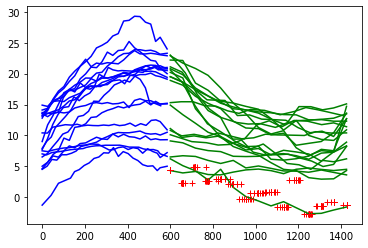

In [57]:
for x in range(len(indices_test)):
    plt.plot(df_aux['Tiem_inp'][indices_test[x]], df_aux['Temp_inp'][indices_test[x]], '-b', label='train')
    plt.plot(df_aux['Tiem_out'][indices_test[x]], df_aux['Temp_out'][indices_test[x]], '-g', label='truth')
    # plt.plot(df_aux['Tiem_out'][indices_test[x]], D_output_test[x], label='pred')
    plt.plot(df_aux['Tiem_out'][indices_test[x]], D_output_pred[x], '+r', label='pred')
plt.show()

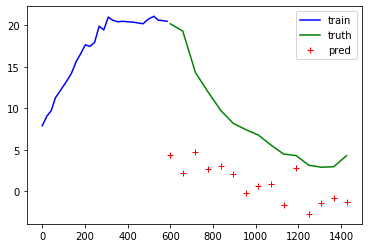

In [58]:
x = 7
plt.plot(df_aux['Tiem_inp'][indices_test[x]], df_aux['Temp_inp'][indices_test[x]], '-b', label='train')
plt.plot(df_aux['Tiem_out'][indices_test[x]], df_aux['Temp_out'][indices_test[x]], '-g', label='truth')
# plt.plot(df_aux['Tiem_out'][indices_test[x]], D_output_test[x], label='pred')
plt.plot(df_aux['Tiem_out'][indices_test[x]], D_output_pred[x], '+r', label='pred')
plt.legend()

In [ ]:
# print(__doc__)

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# from sklearn.inspection import partial_dependence
# from sklearn.inspection import plot_partial_dependence
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.datasets.california_housing import fetch_california_housing


# def main():
#     cal_housing = fetch_california_housing()

#     X, y = cal_housing.data, cal_housing.target
#     names = cal_housing.feature_names

#     # Center target to avoid gradient boosting init bias: gradient boosting
#     # with the 'recursion' method does not account for the initial estimator
#     # (here the average target, by default)
#     y -= y.mean()

#     print("Training MLPRegressor...")
#     est = MLPRegressor(activation='logistic')
#     est.fit(X, y)
#     print('Computing partial dependence plots...')
#     # We don't compute the 2-way PDP (5, 1) here, because it is a lot slower
#     # with the brute method.
#     features = [0, 5, 1, 2]
#     plot_partial_dependence(est, X, features, feature_names=names,
#                             n_jobs=3, grid_resolution=50)
#     fig = plt.gcf()
#     fig.suptitle('Partial dependence of house value on non-location features\n'
#                  'for the California housing dataset, with MLPRegressor')
#     plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

#     print("Training GradientBoostingRegressor...")
#     est = GradientBoostingRegressor(n_estimators=100, max_depth=4,
#                                     learning_rate=0.1, loss='huber',
#                                     random_state=1)
#     est.fit(X, y)
#     print('Computing partial dependence plots...')
#     features = [0, 5, 1, 2, (5, 1)]
#     plot_partial_dependence(est, X, features, feature_names=names,
#                             n_jobs=3, grid_resolution=50)
#     fig = plt.gcf()
#     fig.suptitle('Partial dependence of house value on non-location features\n'
#                  'for the California housing dataset, with Gradient Boosting')
#     plt.subplots_adjust(top=0.9)

#     print('Custom 3d plot via ``partial_dependence``')
#     fig = plt.figure()

#     target_feature = (1, 5)
#     pdp, axes = partial_dependence(est, X, target_feature,
#                                    grid_resolution=50)
#     XX, YY = np.meshgrid(axes[0], axes[1])
#     Z = pdp[0].T
#     ax = Axes3D(fig)
#     surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
#                            cmap=plt.cm.BuPu, edgecolor='k')
#     ax.set_xlabel(names[target_feature[0]])
#     ax.set_ylabel(names[target_feature[1]])
#     ax.set_zlabel('Partial dependence')
#     #  pretty init view
#     ax.view_init(elev=22, azim=122)
#     plt.colorbar(surf)
#     plt.suptitle('Partial dependence of house value on median\n'
#                  'age and average occupancy, with Gradient Boosting')
#     plt.subplots_adjust(top=0.9)

#     plt.show()


# # Needed on Windows because plot_partial_dependence uses multiprocessing
# if __name__ == '__main__':
#     main()

In [ ]:

# # Author: Vincent Dubourg <vincent.dubourg@gmail.com>
# #         Jake Vanderplas <vanderplas@astro.washington.edu>
# #         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# # License: BSD 3 clause

# import numpy as np
# from matplotlib import pyplot as plt

# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# np.random.seed(1)


# def f(x):
#     """The function to predict."""
#     return x * np.sin(x)

# # ----------------------------------------------------------------------
# #  First the noiseless case
# X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# # Observations
# y = f(X).ravel()

# # Mesh the input space for evaluations of the real function, the prediction and
# # its MSE
# x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# # Instantiate a Gaussian Process model
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# # Fit to data using Maximum Likelihood Estimation of the parameters
# gp.fit(X, y)

# # Make the prediction on the meshed x-axis (ask for MSE as well)
# y_pred, sigma = gp.predict(x, return_std=True)

# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
# plt.figure()
# plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
# plt.plot(X, y, 'r.', markersize=10, label='Observations')
# plt.plot(x, y_pred, 'b-', label='Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('$x$')
# plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
# plt.legend(loc='upper left')

# # ----------------------------------------------------------------------
# # now the noisy case
# X = np.linspace(0.1, 8.9, 6)
# X = np.atleast_2d(X).T

# # Observations and noise
# y = f(X).ravel()
# dy = 0.5 + 1.0 * np.random.random(y.shape)
# noise = np.random.normal(0, dy)
# y += noise

# # Instantiate a Gaussian Process model
# gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
#                               n_restarts_optimizer=10)

# # Fit to data using Maximum Likelihood Estimation of the parameters
# gp.fit(X, y)

# # Make the prediction on the meshed x-axis (ask for MSE as well)
# y_pred, sigma = gp.predict(x, return_std=True)

# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
# plt.figure()
# plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
# plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
# plt.plot(x, y_pred, 'b-', label='Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('$x$')
# plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
# plt.legend(loc='upper left')

# plt.show()

In [ ]:
# # crear base de entrenamiento
# y_p1 = df_prueba2['Temp'][5]
# y_p2 = df_prueba2['Temp'][6]
# y_p3 = df_prueba2['Temp'][7]
# y_p4 = df_prueba2['Temp'][8]
# y_p = np.concatenate([y_p1, y_p2, y_p3, y_p4])

# aux = []
# # sub-muestrear
# for i, x in enumerate(y_p):
#     if i % 6 == 0:
#         aux.append(x)
# y_p = np.array(aux) - np.min(aux)
# y_p = y_p / np.max(y_p)

# # print(y_p)
# x_p = np.linspace(0, len(y_p), len(y_p))
# x_p = np.atleast_2d(x_p).T
# y = y_p[:-round(len(y_p)/5)]
# X = np.linspace(0, len(y), len(y))
# X = np.atleast_2d(X).T

# plt.plot(X, y, 'r')
# plt.plot(x_p, y_p, '+b')


In [ ]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)
# # gp = GaussianProcessRegressor(n_restarts_optimizer=100)

# gp.fit(X, y)


In [ ]:
# x = np.atleast_2d(np.linspace(0, len(y_p), 40*len(y_p))).T

# # Make the prediction on the meshed x-axis (ask for MSE as well)
# y_pred, sigma = gp.predict(x, return_std=True)

# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
# plt.figure()
# # plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
# # plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
# plt.plot(x_p, y_p, 'r-', label='truth')
# plt.plot(x, y_pred, 'b-', label='Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('$x$')
# plt.ylabel('$f(x)$')
# # plt.ylim(-10, 20)
# plt.legend()

# plt.show()